In [ ]:
import warnings
warnings.filterwarnings("ignore")
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, UpSampling3D, Conv2DTranspose, concatenate
from tensorflow.keras.layers import BatchNormalization
from keras.backend import set_session
from keras.backend import clear_session
from keras.backend import get_session


import numpy as np
from numpy import unravel_index
import pandas as pd

from os import listdir
import os, os.path

import glob

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import skimage.measure
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score

from PIL import Image

import re
import gc

import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Loaded: data_6_36_44
(20, 100, 100, 1)
Loaded: data_6_91_89
(200, 100, 100, 1)
Loaded: data_2_91_89
(200, 100, 100, 1)
Loaded: data_4_91_89
(200, 100, 100, 1)
Loaded: data_2_115_65
(200, 100, 100, 1)
Loaded: data_6_115_65
(200, 100, 100, 1)
Loaded: data_2_105_74
(200, 100, 100, 1)
Loaded: data_4_115_65
(200, 100, 100, 1)
Loaded: data_6_105_74
(200, 100, 100, 1)
Loaded: data_4_105_74
(200, 100, 100, 1)
0.0
1.0


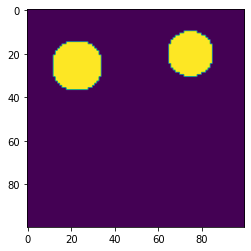

In [ ]:
filepath = '/content/drive/MyDrive/Dataset/Non_Uniform/Resized_New_Data/Images100x100_newData(maxpool_1ch)'
imageDict = {}
for filename in os.listdir(filepath):
    path = os.path.join(filepath, filename)
    key = filename.split('.')[0]
    imageDict[key] = np.load(path,allow_pickle=True)
    print('Loaded: '+ key)
    print(imageDict[key].shape)


plt.imshow(imageDict['data_2_105_74'][70,:,:,0])
print(imageDict['data_2_105_74'][70].min())
print(imageDict['data_2_105_74'][70].max())

Loaded: data_2_115_65
(200, 100, 100, 1)
Loaded: data_4_105_74
(200, 100, 100, 1)
Loaded: data_4_115_65
(200, 100, 100, 1)
Loaded: data_6_105_74
(200, 100, 100, 1)
Loaded: data_2_105_74
(200, 100, 100, 1)
Loaded: data_4_91_89
(200, 100, 100, 1)
Loaded: data_2_91_89
(200, 100, 100, 1)
Loaded: data_6_115_65
(200, 100, 100, 1)
Loaded: data_6_91_89
(200, 100, 100, 1)
-0.049080558180343604
3.4416503156260663


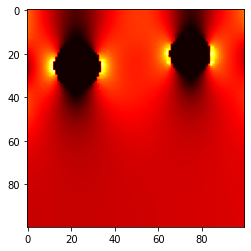

In [ ]:
DIR = '/content/drive/MyDrive/Dataset/Non_Uniform/Resized_New_Data/Stress100x100_newData(normalized_max_1ch)'
matrixDict = {}
for filename in os.listdir(DIR):
    path = os.path.join(DIR, filename)
    key = filename.split('.')[0]
    matrixDict[key] = np.load(path)
    print('Loaded: '+ key)
    print(matrixDict[key].shape)
    
plt.imshow(matrixDict['data_2_105_74'][70][:,:,0], cmap='hot')
print(matrixDict['data_2_105_74'][70].min())
print(matrixDict['data_2_105_74'][70].max())

In [ ]:
# Combine X datas
x = np.concatenate((imageDict['data_2_105_74'], imageDict['data_2_115_65'],
                    imageDict['data_2_91_89'],imageDict['data_4_105_74'],imageDict['data_4_115_65'],
                    imageDict['data_4_91_89'], imageDict['data_6_91_89'], imageDict['data_6_105_74'],
                    imageDict['data_6_115_65'],), axis = 0)   
x.shape

(1800, 100, 100, 1)

In [ ]:
# Combine Y datas 
y = np.concatenate((matrixDict['data_2_105_74'], matrixDict['data_2_115_65'],
                    matrixDict['data_2_91_89'],matrixDict['data_4_105_74'],matrixDict['data_4_115_65'],
                    matrixDict['data_4_91_89'], matrixDict['data_6_91_89'], matrixDict['data_6_105_74'],
                    matrixDict['data_6_115_65'],), axis = 0) 
y.shape

(1800, 100, 100, 1)

In [ ]:
# Since there are total 1100 images,
# training data is 90% : 990
# testing data is 10% : 110
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.1, 
                                                    random_state=42)

print('Shape of x_train',x_train.shape,'\n',
      'Shape of x_test',x_test.shape,'\n', 
      'Shape of y_train',y_train.shape,'\n', 
      'Shape of y_test',y_test.shape)

Shape of x_train (1620, 100, 100, 1) 
 Shape of x_test (180, 100, 100, 1) 
 Shape of y_train (1620, 100, 100, 1) 
 Shape of y_test (180, 100, 100, 1)


In [ ]:
# For observing effects of data size, 

idx = np.random.randint(1620, size=100)
x_train_100 = x_train[idx,:,:,:]
y_train_100 = y_train[idx,:,:,:]
print('Shape of x_train_100',x_train_100.shape,'\n',
      'Shape of y_train_100',y_train_100.shape,'\n')

idx = np.random.randint(1620, size=300)
x_train_300 = x_train[idx,:,:,:]
y_train_300 = y_train[idx,:,:,:]
print('Shape of x_train_300',x_train_300.shape,'\n',
      'Shape of y_train_300',y_train_300.shape,'\n')

idx = np.random.randint(1620, size=500)
x_train_500 = x_train[idx,:,:,:]
y_train_500 = y_train[idx,:,:,:]
print('Shape of x_train_500',x_train_500.shape,'\n',
      'Shape of y_train_500',y_train_500.shape,'\n')

idx = np.random.randint(1620, size=700)
x_train_700 = x_train[idx,:,:,:]
y_train_700 = y_train[idx,:,:,:]
print('Shape of x_train_700',x_train_700.shape,'\n',
      'Shape of y_train_700',y_train_700.shape,'\n')

idx = np.random.randint(1620, size=900)
x_train_900 = x_train[idx,:,:,:]
y_train_900 = y_train[idx,:,:,:]
print('Shape of x_train_900',x_train_900.shape,'\n',
      'Shape of y_train_900',y_train_900.shape,'\n')

idx = np.random.randint(1620, size=1100)
x_train_1100 = x_train[idx,:,:,:]
y_train_1100 = y_train[idx,:,:,:]
print('Shape of x_train_1100',x_train_1100.shape,'\n',
      'Shape of y_train_1100',y_train_1100.shape,'\n')

idx = np.random.randint(1620, size=1300)
x_train_1300 = x_train[idx,:,:,:]
y_train_1300 = y_train[idx,:,:,:]
print('Shape of x_train_1300',x_train_1300.shape,'\n',
      'Shape of y_train_1300',y_train_1300.shape,'\n')

x_train_1620 = np.copy(x_train)
y_train_1620 = np.copy(y_train)
print('Shape of x_train_1620',x_train_1620.shape,'\n',
      'Shape of y_train_1620',y_train_1620.shape)

Shape of x_train_100 (100, 100, 100, 1) 
 Shape of y_train_100 (100, 100, 100, 1) 

Shape of x_train_300 (300, 100, 100, 1) 
 Shape of y_train_300 (300, 100, 100, 1) 

Shape of x_train_500 (500, 100, 100, 1) 
 Shape of y_train_500 (500, 100, 100, 1) 

Shape of x_train_700 (700, 100, 100, 1) 
 Shape of y_train_700 (700, 100, 100, 1) 

Shape of x_train_900 (900, 100, 100, 1) 
 Shape of y_train_900 (900, 100, 100, 1) 

Shape of x_train_1100 (1100, 100, 100, 1) 
 Shape of y_train_1100 (1100, 100, 100, 1) 

Shape of x_train_1300 (1300, 100, 100, 1) 
 Shape of y_train_1300 (1300, 100, 100, 1) 

Shape of x_train_1620 (1620, 100, 100, 1) 
 Shape of y_train_1620 (1620, 100, 100, 1)


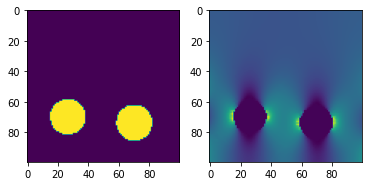

[[[1.04267305]
  [1.04285747]
  [1.04302282]
  ...
  [1.08877679]
  [1.08972829]
  [1.09066378]]

 [[1.04324851]
  [1.04341395]
  [1.04387876]
  ...
  [1.08913908]
  [1.09011157]
  [1.09106804]]

 [[1.04380163]
  [1.04462211]
  [1.04425087]
  ...
  [1.08983044]
  [1.09063044]
  [1.09145723]]

 ...

 [[1.69702161]
  [1.6458668 ]
  [1.59446613]
  ...
  [1.70401833]
  [1.7647857 ]
  [1.82381838]]

 [[1.69672476]
  [1.64542167]
  [1.59514756]
  ...
  [1.70944644]
  [1.76881411]
  [1.82792583]]

 [[1.69640782]
  [1.64495579]
  [1.59496951]
  ...
  [1.71367172]
  [1.77311842]
  [1.83230917]]]


In [ ]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_train_100[70][:,:,0])
f.add_subplot(1,2, 2)
plt.imshow(y_train_100[70][:,:,0])
plt.show(block=True)
print(y_train_100[70])

In [ ]:
# A function calculating Percentage Error
def percentage_err_3channels(y_pred, y_test):
    arr = []
    for idx in range(len(y_test)):
        if(y_test[idx] == 0):
            continue
        else:
            err = ((np.abs(y_pred[idx] - y_test[idx]) / y_test[idx]) * 100)
            arr.append(err)
    
    return abs(np.mean(arr))

# A Function to calculate R2 for each pore
def calculateR2_for_pores(preds, y_test, AVMat):
    b = []
    c = []
    TSS = 0
    RSS = 0
    
    for i in range(len(y_test)):
        b = ((y_test[i] - preds[i])**2)
        RSS = RSS + b
        
    for i in range(len(y_test)):
        c = ((y_test[i] -  AVMat)**2)
        TSS = TSS + c

    R2 = (abs(1 - (RSS/TSS)))
    return R2.mean()
    
# A function to obtain AVMat
def calculateAVMat(y_test):
    AVMat = np.zeros((100,100,1))

    for i in range(len(y_test)):
        AVMat = AVMat + (y_test[i].reshape(100,100,1))
    
    AVMat = AVMat/len(y_test)
    
    return AVMat

# A function calculating MaxStress
def calculateMaxStress(data):
    resArray = []
    
    for i in range(len(data)):
        resArray.append(np.amax(data[i].reshape(1,10000)))
    
    return resArray


In [ ]:
# Function reset the model
def reset_keras(model):
    sess = tf.compat.v1.keras.backend.get_session()
    clear_session()
    sess.close()
    sess = tf.compat.v1.keras.backend.get_session()

    try:
        del model
    except:
        pass

    print(gc.collect()) # if it's done something you should see a number being outputted

    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [ ]:
# Setting training configuration
batch_size = 100 #initially 100
epochs = 30 #initially 30
AVMat = []
R2Array_train = []
R2Array_test = []
err_train_3ch = []
err_test_3ch = []

In [ ]:
AVMat = calculateAVMat(y_train)

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [ ]:
# U-Net model
def buildModel():
    img_input = Input(shape=(100,100,1))

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    block1_conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(block1_conv2)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    block2_conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(block2_conv2)

    # Block 3

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    
    # Block 4
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    #x = UpSampling2D(size=(2,2), data_format=None, interpolation='nearest')(x)
    x = concatenate([UpSampling2D((2, 2))(x), block2_conv2], axis=-1)
    
    # Block 5
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    #x = UpSampling2D(size=(2,2), data_format=None, interpolation='nearest')(x)
    x = concatenate([UpSampling2D((2, 2))(x), block1_conv2], axis=-1)
    x = Conv2DTranspose(1, kernel_size=(3,3), padding='same', data_format=None, activation='relu')(x)
    
    
    model = Model(inputs = img_input, outputs = x)
    
    model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam())
    model.summary()
    return model

In [ ]:
#Training with 100 data
model = buildModel()
model.fit(x_train_100, y_train_100, batch_size=batch_size, epochs=epochs, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 100, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
%%time
preds_train = model.predict(x_train_100)
preds = model.predict(x_test)

CPU times: user 2.82 s, sys: 25.9 ms, total: 2.85 s
Wall time: 3.06 s


In [ ]:
y_train_maxStress = calculateMaxStress(y_train_100)
preds_train_maxStress = calculateMaxStress(preds_train)
preds_maxStress = calculateMaxStress(preds)
y_test_maxStress = calculateMaxStress(y_test)

In [ ]:
R2Array_train.append(calculateR2_for_pores(preds_train_maxStress, y_train_maxStress, AVMat))
R2Array_test.append(calculateR2_for_pores(preds_maxStress, y_test_maxStress, AVMat))

err_train_3ch.append(percentage_err_3channels(preds_train_maxStress, y_train_maxStress))
err_test_3ch.append(percentage_err_3channels(preds_maxStress, y_test_maxStress))

print(R2Array_train)
print(R2Array_test)
print(err_train_3ch)
print(err_test_3ch)

reset_keras(model)

[0.11632775341056635]
[0.11231994939767208]
[79.52430054440384]
[79.84819965667673]
6565


In [ ]:
#Train with 300 data points
model = buildModel()
model.fit(x_train_300, y_train_300, batch_size=batch_size, epochs=epochs, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 100, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
%%time
preds_train = model.predict(x_train_300)
preds = model.predict(x_test)

y_train_maxStress = calculateMaxStress(y_train_300)
preds_train_maxStress = calculateMaxStress(preds_train)
preds_maxStress = calculateMaxStress(preds)
y_test_maxStress = calculateMaxStress(y_test)

R2Array_train.append(calculateR2_for_pores(preds_train_maxStress, y_train_maxStress, AVMat))
R2Array_test.append(calculateR2_for_pores(preds_maxStress, y_test_maxStress, AVMat))

err_train_3ch.append(percentage_err_3channels(preds_train_maxStress, y_train_maxStress))
err_test_3ch.append(percentage_err_3channels(preds_maxStress, y_test_maxStress))

print(R2Array_train)
print(R2Array_test)
print(err_train_3ch)
print(err_test_3ch)

reset_keras(model)

[0.11632775341056635, 0.8047277703437148]
[0.11231994939767208, 0.806519120636976]
[79.52430054440384, 28.740943999451854]
[79.84819965667673, 27.89405207928108]
1414
CPU times: user 1.95 s, sys: 18.7 ms, total: 1.97 s
Wall time: 2.06 s


In [ ]:
#Train with 500 data points
model = buildModel()

model.fit(x_train_500, y_train_500, 
          batch_size=batch_size, epochs=epochs, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 100, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
%%time
preds_train = model.predict(x_train_500)
preds = model.predict(x_test)

y_train_maxStress = calculateMaxStress(y_train_500)
preds_train_maxStress = calculateMaxStress(preds_train)
preds_maxStress = calculateMaxStress(preds)
y_test_maxStress = calculateMaxStress(y_test)

R2Array_train.append(calculateR2_for_pores(preds_train_maxStress, y_train_maxStress, AVMat))
R2Array_test.append(calculateR2_for_pores(preds_maxStress, y_test_maxStress, AVMat))

err_train_3ch.append(percentage_err_3channels(preds_train_maxStress, y_train_maxStress))
err_test_3ch.append(percentage_err_3channels(preds_maxStress, y_test_maxStress))

print(R2Array_train)
print(R2Array_test)
print(err_train_3ch)
print(err_test_3ch)

reset_keras(model)

[0.11632775341056635, 0.8047277703437148, 0.8353275290369911]
[0.11231994939767208, 0.806519120636976, 0.8425205654785838]
[79.52430054440384, 28.740943999451854, 25.31203334371032]
[79.84819965667673, 27.89405207928108, 24.0945927223758]
1415
CPU times: user 1.96 s, sys: 29.9 ms, total: 1.99 s
Wall time: 2.33 s


In [ ]:
#Train with 700 data points
model = buildModel()

model.fit(x_train_700, y_train_700, 
          batch_size=batch_size, epochs=epochs, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 100, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
%%time
preds_train = model.predict(x_train_700)
preds = model.predict(x_test)

y_train_maxStress = calculateMaxStress(y_train_700)
preds_train_maxStress = calculateMaxStress(preds_train)
preds_maxStress = calculateMaxStress(preds)
y_test_maxStress = calculateMaxStress(y_test)

R2Array_train.append(calculateR2_for_pores(preds_train_maxStress, y_train_maxStress, AVMat))
R2Array_test.append(calculateR2_for_pores(preds_maxStress, y_test_maxStress, AVMat))

err_train_3ch.append(percentage_err_3channels(preds_train_maxStress, y_train_maxStress))
err_test_3ch.append(percentage_err_3channels(preds_maxStress, y_test_maxStress))

print(R2Array_train)
print(R2Array_test)
print(err_train_3ch)
print(err_test_3ch)

reset_keras(model)

[0.11632775341056635, 0.8047277703437148, 0.8353275290369911, 0.933023446822288]
[0.11231994939767208, 0.806519120636976, 0.8425205654785838, 0.9393813014763865]
[79.52430054440384, 28.740943999451854, 25.31203334371032, 14.35362227558815]
[79.84819965667673, 27.89405207928108, 24.0945927223758, 13.716130436059546]
1399
CPU times: user 3.27 s, sys: 30 ms, total: 3.3 s
Wall time: 3.62 s


In [ ]:
#Train with 900 data points
model = buildModel()

model.fit(x_train_900, y_train_900, 
          batch_size=batch_size, epochs=epochs, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 100, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
%%time

preds_train = model.predict(x_train_900)
preds = model.predict(x_test)

y_train_maxStress = calculateMaxStress(y_train_900)
preds_train_maxStress = calculateMaxStress(preds_train)
preds_maxStress = calculateMaxStress(preds)
y_test_maxStress = calculateMaxStress(y_test)

R2Array_train.append(calculateR2_for_pores(preds_train_maxStress, y_train_maxStress, AVMat))
R2Array_test.append(calculateR2_for_pores(preds_maxStress, y_test_maxStress, AVMat))

err_train_3ch.append(percentage_err_3channels(preds_train_maxStress, y_train_maxStress))
err_test_3ch.append(percentage_err_3channels(preds_maxStress, y_test_maxStress))

print(R2Array_train)
print(R2Array_test)
print(err_train_3ch)
print(err_test_3ch)

reset_keras(model)

[0.11632775341056635, 0.8047277703437148, 0.8353275290369911, 0.933023446822288, 0.9069035958567263]
[0.11231994939767208, 0.806519120636976, 0.8425205654785838, 0.9393813014763865, 0.9074720884294019]
[79.52430054440384, 28.740943999451854, 25.31203334371032, 14.35362227558815, 18.82744158458308]
[79.84819965667673, 27.89405207928108, 24.0945927223758, 13.716130436059546, 18.709931167304198]
1415
CPU times: user 2.81 s, sys: 23 ms, total: 2.83 s
Wall time: 3.41 s


In [ ]:
#Train with 1100 data points
model = buildModel()

model.fit(x_train_1100, y_train_1100, 
          batch_size=batch_size, epochs=epochs, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 100, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
%%time
preds_train = model.predict(x_train_1100)
preds = model.predict(x_test)

CPU times: user 3.02 s, sys: 42.1 ms, total: 3.06 s
Wall time: 3.43 s


In [ ]:
y_train_maxStress = calculateMaxStress(y_train_1100)
preds_train_maxStress = calculateMaxStress(preds_train)
preds_maxStress = calculateMaxStress(preds)
y_test_maxStress = calculateMaxStress(y_test)

R2Array_train.append(calculateR2_for_pores(preds_train_maxStress, y_train_maxStress, AVMat))
R2Array_test.append(calculateR2_for_pores(preds_maxStress, y_test_maxStress, AVMat))

err_train_3ch.append(percentage_err_3channels(preds_train_maxStress, y_train_maxStress))
err_test_3ch.append(percentage_err_3channels(preds_maxStress, y_test_maxStress))

print(R2Array_train)
print(R2Array_test)
print(err_train_3ch)
print(err_test_3ch)

reset_keras(model)

[0.11632775341056635, 0.8047277703437148, 0.8353275290369911, 0.933023446822288, 0.9069035958567263, 0.9613592529403653]
[0.11231994939767208, 0.806519120636976, 0.8425205654785838, 0.9393813014763865, 0.9074720884294019, 0.9600520694235727]
[79.52430054440384, 28.740943999451854, 25.31203334371032, 14.35362227558815, 18.82744158458308, 11.109429290826549]
[79.84819965667673, 27.89405207928108, 24.0945927223758, 13.716130436059546, 18.709931167304198, 12.049050831481827]
2117


In [ ]:
#Train with 1300 data points
model = buildModel()

model.fit(x_train_1300, y_train_1300, 
          batch_size=batch_size, epochs=epochs, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 100, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
%%time
preds_train = model.predict(x_train_1300)
preds = model.predict(x_test)

CPU times: user 3.48 s, sys: 35 ms, total: 3.51 s
Wall time: 3.47 s


In [ ]:
y_train_maxStress = calculateMaxStress(y_train_1300)
preds_train_maxStress = calculateMaxStress(preds_train)
preds_maxStress = calculateMaxStress(preds)
y_test_maxStress = calculateMaxStress(y_test)

R2Array_train.append(calculateR2_for_pores(preds_train_maxStress, y_train_maxStress, AVMat))
R2Array_test.append(calculateR2_for_pores(preds_maxStress, y_test_maxStress, AVMat))

err_train_3ch.append(percentage_err_3channels(preds_train_maxStress, y_train_maxStress))
err_test_3ch.append(percentage_err_3channels(preds_maxStress, y_test_maxStress))

print(R2Array_train)
print(R2Array_test)
print(err_train_3ch)
print(err_test_3ch)

reset_keras(model)

[0.11632775341056635, 0.8047277703437148, 0.8353275290369911, 0.933023446822288, 0.9069035958567263, 0.9613592529403653, 0.9446216159703881]
[0.11231994939767208, 0.806519120636976, 0.8425205654785838, 0.9393813014763865, 0.9074720884294019, 0.9600520694235727, 0.9442819414175052]
[79.52430054440384, 28.740943999451854, 25.31203334371032, 14.35362227558815, 18.82744158458308, 11.109429290826549, 13.44481660295645]
[79.84819965667673, 27.89405207928108, 24.0945927223758, 13.716130436059546, 18.709931167304198, 12.049050831481827, 14.009658433019478]
1399


In [ ]:
#Train with 1620 data points
model = buildModel()

model.fit(x_train_1620, y_train_1620, batch_size=batch_size, epochs=epochs, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 100, 100, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
%%time
preds_train = model.predict(x_train_1620)
preds = model.predict(x_test)

CPU times: user 4.19 s, sys: 38.1 ms, total: 4.22 s
Wall time: 4.29 s


In [ ]:
y_train_maxStress = calculateMaxStress(y_train_1620)
preds_train_maxStress = calculateMaxStress(preds_train)
preds_maxStress = calculateMaxStress(preds)
y_test_maxStress = calculateMaxStress(y_test)

R2Array_train.append(calculateR2_for_pores(preds_train_maxStress, y_train_maxStress, AVMat))
R2Array_test.append(calculateR2_for_pores(preds_maxStress, y_test_maxStress, AVMat))

err_train_3ch.append(percentage_err_3channels(preds_train_maxStress, y_train_maxStress))
err_test_3ch.append(percentage_err_3channels(preds_maxStress, y_test_maxStress))

print(R2Array_train)
print(R2Array_test)
print(err_train_3ch)
print(err_test_3ch)

[0.11632775341056635, 0.8047277703437148, 0.8353275290369911, 0.933023446822288, 0.9069035958567263, 0.9613592529403653, 0.9446216159703881, 0.9706031614988909]
[0.11231994939767208, 0.806519120636976, 0.8425205654785838, 0.9393813014763865, 0.9074720884294019, 0.9600520694235727, 0.9442819414175052, 0.9725024802770688]
[79.52430054440384, 28.740943999451854, 25.31203334371032, 14.35362227558815, 18.82744158458308, 11.109429290826549, 13.44481660295645, 10.083641015982689]
[79.84819965667673, 27.89405207928108, 24.0945927223758, 13.716130436059546, 18.709931167304198, 12.049050831481827, 14.009658433019478, 10.175214251848965]
